## Search by continuous-time quantum walk (CTQW) on Johnson graphs $J(n,k)$

In [1]:
import hiperwalk as hpw
import numpy as np
import networkx as nx
import math
import itertools
import matplotlib.pyplot as plt

### Defining $J(n,k)$ using NetworkX

In [2]:
def Johnson_graph(n, k):
    G = nx.Graph()
    
    # Generate all k-element subsets of an n-element set
    vertices = list(itertools.combinations(range(n), k))
    
    # Add vertices to the graph
    G.add_nodes_from(vertices)
    
    # Add edges between vertices if they share exactly (k-1) elements
    for u, v in itertools.combinations(vertices, 2):
        if len(set(u).intersection(v)) == k - 1:
            G.add_edge(u, v)
    
    return G

### Defining the optimal $\gamma(n,k)$

See the details in <a href="https://arxiv.org/abs/2108.01992">Spatial Search on Johnson Graphs by Continuous-Time Quantum Walk</a>.

In [3]:
# optimal gamma for arbitrary n and k
def gamma(n,k):
    epsilon = 1/np.sqrt(n)
    s = sum(p_square(epsilon, l, k)/(r_l(epsilon, 0, k) - r_l(epsilon, l, k)) for l in range(1,k+1))
    return epsilon**2*s

def r_l(epsilon, l, k):
    return (k - l) * (1 - (k + l) * epsilon**2) - l * epsilon**2

def p_square(epsilon, l, k):
    denom = (math.factorial(l)*p_square_aux(epsilon, l, k))
    return (epsilon**(2*k - 2*l)*math.factorial(k)*(1 - (2*l - 1) * epsilon**2)) / denom

def p_square_aux(epsilon, l, k):
    return math.prod(1 - (j - 1) * epsilon**2 for j in range(l, k + 1))

### Defining the hiperwalk graph and the QW instance

In [4]:
n = 10
k = 2 
N = math.comb(n,k) # number of vertices

adj_matrix = nx.adjacency_matrix(Johnson_graph(n, k)).todense()
graph = hpw.Graph(adj_matrix)

qw = hpw.ContinuousTime(graph, gamma = gamma(n,k), time = 1.0, marked={0})

### Setting the initial state

In [5]:
psi0 = qw.uniform_state()

### Success probability as a function of the number of steps

The optimal number of steps is $\frac{\pi}{2}\sqrt{N}$

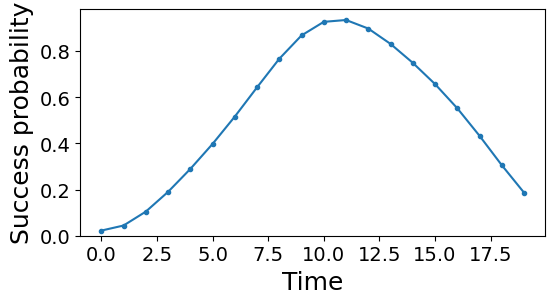

In [6]:
steps = 2*int(np.pi/2*np.sqrt(N))
states = qw.simulate(range=steps, state=psi0)
succ_prob = qw.success_probability(states)
hpw.plot_success_probability(steps, succ_prob, marker='.', figsize=(6,3))

### Animating the quantum walk

In [7]:
list_of_states = qw.simulate(range = steps, state = psi0)
list_of_probs = qw.probability_distribution(list_of_states)
hpw.plot_probability_distribution(list_of_probs, range=steps, animate=True)